In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [108]:
ds = xr.open_dataset('../../processed2/tif_94.nc')

In [109]:
ds

<xarray.Dataset>
Dimensions:                             (y: 3000, x: 3000)
Coordinates:
  * x                                   (x) float64 2.92e+05 ... 3.82e+05
  * y                                   (y) float64 4.372e+06 ... 4.282e+06
Data variables: (12/15)
    Landsat_Blue_Vis_Sfc_Reflectance    (y, x) float64 ...
    Landsat_Red_Vis_Sfc_Reflectance     (y, x) float64 ...
    Landsat_NIR_Sfc_Reflectance         (y, x) float64 ...
    Landsat_SWIR1_Sfc_Reflectance       (y, x) float64 ...
    Landsat_SWIR2_Sfc_Reflectance       (y, x) float64 ...
    Landsat_LST                         (y, x) float64 ...
    ...                                  ...
    GOES_NIR_Veggie_Reflectance         (y, x) float64 ...
    GOES_NIR_SnowIce_Reflectance        (y, x) float64 ...
    GOES_NIR_CloudParticle_Reflectance  (y, x) float64 ...
    GOES_LWIR_Brightness_Temp           (y, x) float64 ...
    GOES_Dirty_LWIR_Brightness_temp     (y, x) float64 ...
    spatial_ref                         int64 ...
Attributes:
    AREA_OR_POINT:    Area
    scale_factor:     1.0
    add_offset:       0.0
    long_name:        ['SR_B2', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7', 'ST_B10',...
    Cloud_Mask_Bits:  Bit 0: Fill\nBit 1: Dilated Cloud\nBit 2: Cirrus (high ...
    Datetime:         2024-07-08 11:46:17

In [138]:
ds.Landsat_Cloud_Mask.values[0,0][-8] + ds.Landsat_Cloud_Mask.values[0,0][-4:-1]

'0110'

In [140]:
water = np.array([[s[-8]+s[-4:-1] for s in line] for line in ds.Landsat_Cloud_Mask.values])

In [141]:
mask = (water == '0000')*1

In [142]:
np.sum((ds.Landsat_LST)*mask == 0)

<xarray.DataArray 'Landsat_LST' ()>
array(3646546)

In [171]:
dss = ds.sel(x=slice(349000,368500)).sel(y=slice(4362500,4343000))

In [172]:
water = np.array([[s[-8]+s[-4:-1] for s in line] for line in dss.Landsat_Cloud_Mask.values])

In [173]:
mask = (water == '0000')*1

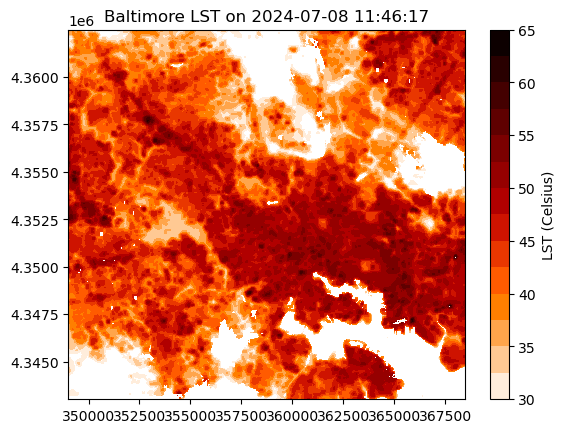

In [410]:
f=plt.figure()
ax = f.add_subplot()
plt.contourf(dss.x,dss.y,dss.Landsat_LST*mask-273.15,cmap=plt.cm.gist_heat_r, levels=np.linspace(30,65,15))
#ax.set_xticklabels(rotation=45)
#plt.xlabel('longitude')
#plt.ylabel('latitude')
plt.title(f'Baltimore LST on {ds.Datetime}')
cb=plt.colorbar(ticks = list(np.arange(30, 66, 5)))
cb.set_label('LST (Celsius)')
#plt.savefig('march_slp.png')

In [399]:
LSTs = np.array(dss.Landsat_LST*mask-273.15).flatten()

In [400]:
LSTs = LSTs[LSTs > 30]

In [401]:
np.max(LSTs)

61.47583015999999

(array([1.7001e+04, 3.4442e+04, 4.7326e+04, 5.8676e+04, 7.0451e+04,
        6.7363e+04, 4.8346e+04, 9.9920e+03, 6.4200e+02, 6.1000e+01]),
 array([30.002702  , 33.15001482, 36.29732763, 39.44464045, 42.59195326,
        45.73926608, 48.8865789 , 52.03389171, 55.18120453, 58.32851734,
        61.47583016]),
 <BarContainer object of 10 artists>)

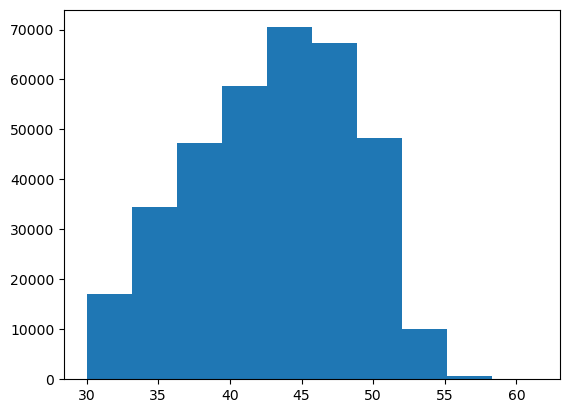

In [402]:
plt.hist(LSTs)

In [404]:
LSTs

array([35.06478962, 35.3348132 , 35.54673044, ..., 40.56780182,
       38.43837536, 36.12779384])

Text(0.5, 1.0, 'Baltimore LST Boxplot')

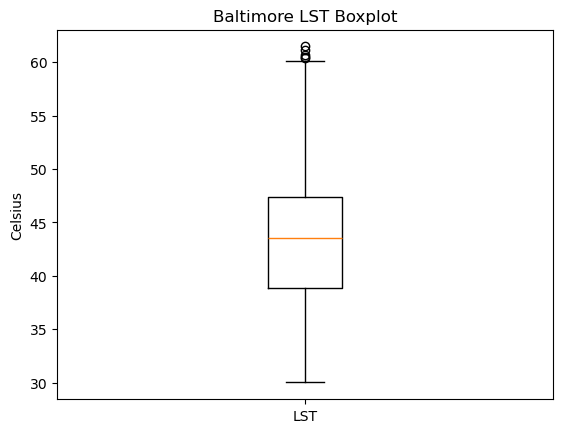

In [405]:
plt.boxplot(x=LSTs, labels=['LST'])
plt.ylabel('Celsius')
plt.title('Baltimore LST Boxplot')

In [406]:
q1 = np.percentile(LSTs, 25)
q3 = np.percentile(LSTs, 75)
iqr = q3 - q1

In [407]:
top_bound = q3+1.5*iqr
outliers = dss.Landsat_LST-273.15 > top_bound
outlier_y, outlier_x = np.where(outliers == True)

In [408]:
outlier_y

array([398, 398, 485, 485, 486, 486, 487, 509, 509, 510, 510, 511, 511,
       512])

In [409]:
outlier_x

array([633, 634, 623, 624, 623, 624, 624, 562, 563, 562, 563, 562, 563,
       562])

In [294]:
import utm

In [316]:
outlier_latlon = []

for i in list(range(len(outlier_y))):
    coord = utm.to_latlon(easting=dss.x[outlier_x[i]], northing=dss.y[outlier_y[i]], zone_number=18, northern=True)
    lat = coord[0].values
    lon = coord[1].values
    outlier_latlon.append((lat, lon)) 

outlier_latlon = np.array(outlier_latlon)

In [355]:
dss.x[outlier_x]

<xarray.DataArray 'x' (x: 42)>
array([367015., 367015., 367015., 352945., 352945., 352915., 352945., 352885.,
       352915., 352945., 352915., 353275., 353275., 349315., 349315., 368005.,
       368035., 367975., 368005., 368035., 368005., 368005., 367705., 367735.,
       367765., 367705., 367735., 367765., 367705., 367735., 365905., 365875.,
       365905., 365845., 365875., 365905., 365845., 365875., 365905., 365845.,
       365875., 365905.])
Coordinates:
  * x        (x) float64 3.67e+05 3.67e+05 3.67e+05 ... 3.659e+05 3.659e+05

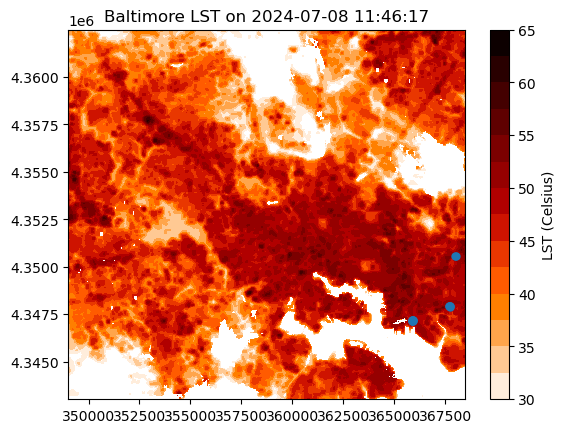

In [411]:
#ax = f.subplot()
#ax.scatter(outlier_latlon[:,0], outlier_latlon[:,1])
f2 = plt.figure(f)
plt.scatter(dss.x[outlier_x], dss.y[outlier_y], s=25, marker = 'o')
plt.show()